In [1]:
import pandas as pd
import glob
import datetime as dt

In [16]:
# Obtain filenames.
filenames = [i for i in glob.glob('../data/final/attempt2/*.csv')]
print(filenames)
# Get all files as dataframes in pandas.
files = []
for i in range(0, len(filenames)):
    files.append(pd.read_csv(filenames[i]))

# Combine all files.
concatenated = pd.concat(files).reset_index(drop=True)


['../data/final/attempt2/L11-cleantokenizedphrased-noLemma-attempt2.csv', '../data/final/attempt2/L13-cleantokenizedphrased-noLemma-attempt2.csv', '../data/final/attempt2/L07-cleantokenizedphrased-noLemma-attempt2.csv', '../data/final/attempt2/L10-cleantokenizedphrased-noLemma-attempt2.csv', '../data/final/attempt2/L12-cleantokenizedphrased-noLemma-attempt2.csv', '../data/final/attempt2/L14-cleantokenizedphrased-noLemma-attempt2.csv', '../data/final/attempt2/L09-cleantokenizedphrased-noLemma-attempt2.csv', '../data/final/attempt2/L08-cleantokenizedphrased-noLemma-attempt2.csv']


In [18]:
concatenated

legislatura       fecha  \
0               11  2016-02-09   
1               11  2016-02-09   
2               11  2016-02-09   
3               11  2016-02-09   
4               11  2016-02-24   
...            ...         ...   
82851            8  2008-01-29   
82852            8  2008-01-29   
82853            8  2008-01-29   
82854            8  2008-01-29   
82855            8  2008-01-29   

                                       objeto_iniciativa numero_expediente  \
0      Solicitud de comparecencia del Ministro de Asu...   213/000017/0000   
1      Solicitud de comparecencia del Ministro de Asu...   213/000017/0000   
2      Solicitud de comparecencia del Ministro de Asu...   213/000017/0000   
3      Solicitud de comparecencia del Ministro de Asu...   213/000017/0000   
4      Proposición no de Ley sobre elaboración de un ...   161/000015/0000   
...                                                  ...               ...   
82851  Real Decreto-Ley 1/2008, de 18 de enero, por e...   130/000052/0000   
82852  Real Decreto-Ley 1/2008, de 18 de enero, por e...   130/000052/0000   
82853  Real Decreto-Ley 1/2008, de 18 de enero, por e...   130/000052/0000   
82854  Real Decreto-Ley 1/2008, de 18 de enero, por e...   130/000052/0000   
82855  Real Decreto-Ley 1/2008, de 18 de enero, por e...   130/000052/0000   

                                          autores  \
0      Grupo Parlamentario Popular en el Congreso   
1      Grupo Parlamentario Popular en el Congreso   
2      Grupo Parlamentario Popular en el Congreso   
3      Grupo Parlamentario Popular en el Congreso   
4                  Grupo Parlamentario Socialista   
...                                           ...   
82851                                    Gobierno   
82852                                    Gobierno   
82853                                    Gobierno   
82854                                    Gobierno   
82855                                    Gobierno   

                               nombre_sesion  \
0             Comisión de Asuntos Exteriores   
1             Comisión de Asuntos Exteriores   
2             Comisión de Asuntos Exteriores   
3             Comisión de Asuntos Exteriores   
4      Comisión de Empleo y Seguridad Social   
...                                      ...   
82851                  Diputación Permanente   
82852                  Diputación Permanente   
82853                  Diputación Permanente   
82854                  Diputación Permanente   
82855                  Diputación Permanente   

                                         orador  \
0            Bustinduy Amador, Pablo (GP-EC-EM)   
1                  Batet Lamaña, Meritxell (GS)   
2             Maura Barandiarán, Fernando (GCs)   
3             García Hernández, José Ramón (GP)   
4      Barandiaran Benito, Íñigo (GV (EAJ-PNV))   
...                                         ...   
82851        Llamazares Trigo, Gaspar (GIU-ICV)   
82852    Olabarría Muñoz, Emilio (GV (EAJ-PNV))   
82853               Puig Cordón, Joan (GER-ERC)   
82854          Sánchez i Llibre, Josep (GC-CiU)   
82855  Fernández Marugán, Francisco Miguel (GS)   

                                              enlace_pdf political_group  \
0      https://www.congreso.es:443/public_oficiales/L...        GP-EC-EM   
1      https://www.congreso.es:443/public_oficiales/L...              GS   
2      https://www.congreso.es:443/public_oficiales/L...             GCs   
3      https://www.congreso.es:443/public_oficiales/L...              GP   
4      https://www.congreso.es:443/public_oficiales/L...    GV (EAJ-PNV)   
...                                                  ...             ...   
82851  https://www.congreso.es:443/public_oficiales/L...         GIU-ICV   
82852  https://www.congreso.es:443/public_oficiales/L...    GV (EAJ-PNV)   
82853  https://www.congreso.es:443/public_oficiales/L...         GER-ERC   
82854  https://www.congreso.es:443/public_oficiales/L...          GC-CiU  

In [19]:
concatenated.text.dropna()

0        Quería sencillamente dejar constancia de que, ...
1        En la misma línea de la intervención anterior,...
2        Señor presidente, en el mismo sentido que yo a...
3        Quiero agradecer esta buena disposición para q...
4        Apoyamos la propuesta, si bien la explicación ...
                               ...                        
82851    Gracias, señor presidente. El Grupo Parlamenta...
82852    Gracias, señor presidente. Intervengo quizás e...
82853    Gracias, señor presidente. Nuestro grupo parla...
82854    Muchas gracias, señor presidente. Señor vicepr...
82855    Señor presi- dente, señor Solbes, señoras y se...
Name: text, Length: 82856, dtype: object

In [20]:
# Descriptive analysis dataset:
# 1. Merge namings that correspond to the same political parties.
    # Removed representatives from the Parlamento de Galicia.
    # Removed representatives from the Senate.
    # Removed minor parties that are not relevant or in which time series does not continue through time.

group_merger = {
    # UP & Co.
    'GCUP-EC-GC': 'UP',
    'GCUP-EC-EM': 'UP',
    'GP-EC-EM': 'UP',

    # IU.
    'GIU': 'IU',
    'GIU-IU-ICV': 'IU',
    'GIP': 'IU',
    'GIU-ICV': 'IU',
    'IULV-CA': 'IU',

    # PP.
    'GP': 'PP',     
    'PPC': 'PP',

    'GS': 'PSOE',   # PSOE.
    'GCs': 'CS',    # Ciudadanos.
    'GVOX': 'VOX',  # Vox.
    'GC-CiU': 'CIU',  # CIU.

    # PNV.
    'GV-PNV': 'PNV',
    'GV (EAJ-PNV)': 'PNV',

    # EH Bildu.
    'GEH Bildu': 'EHB',

    # ERC.
    'GER-IU-ICV': 'ERC', # Since it was mostly ERC and almost no IU.
    'GR': 'ERC',
    'GER': 'ERC',
    'ERC': 'ERC',
    'GER-ERC': 'ERC'}

groups = ['UP', 'IU', 'PP', 'PSOE', 'CS', 'VOX', 'PNV', 'EHB', 'ERC', 'CIU']
concatenated['political_group'] = concatenated['political_group'].replace(group_merger)


In [21]:
concatenated = concatenated.loc[concatenated.political_group.isin(groups)].reset_index(drop=True)


In [22]:
concatenated.text.dropna()

0        Quería sencillamente dejar constancia de que, ...
1        En la misma línea de la intervención anterior,...
2        Señor presidente, en el mismo sentido que yo a...
3        Quiero agradecer esta buena disposición para q...
4        Apoyamos la propuesta, si bien la explicación ...
                               ...                        
68866    Gracias, señor presidente. El Grupo Parlamenta...
68867    Gracias, señor presidente. Intervengo quizás e...
68868    Gracias, señor presidente. Nuestro grupo parla...
68869    Muchas gracias, señor presidente. Señor vicepr...
68870    Señor presi- dente, señor Solbes, señoras y se...
Name: text, Length: 68871, dtype: object

In [25]:
concatenated.to_csv('../data/final/all-data-attempt2.csv', index=False)

Traceback (most recent call last):
  File "../src/features/clean-tokenize.py", line 51, in <module>
    with open('spanish.txt') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'spanish.txt'


In [23]:
# 1. Count the amount of interventions per political party.
concatenated.groupby('political_group').count()

legislatura  fecha  objeto_iniciativa  numero_expediente  \
political_group                                                             
CIU                     4467   4467               4467               4467   
CS                      4760   4760               4760               4760   
EHB                      841    841                841                841   
ERC                     4699   4699               4699               4699   
IU                      2628   2628               2628               2628   
PNV                     5179   5179               5179               5179   
PP                     18530  18530              18530              18530   
PSOE                   18041  18041              18041              18041   
UP                      6131   6131               6131               6131   
VOX                     3595   3595               3595               3595   

                 autores  nombre_sesion  orador  enlace_pdf   text  \
political_group                                                      
CIU                 4467           4467    4467        4467   4467   
CS                  4760           4760    4760        4760   4760   
EHB                  841            841     841         841    841   
ERC                 4699           4699    4699        4699   4699   
IU                  2628           2628    2628        2628   2628   
PNV                 5179           5179    5179        5179   5179   
PP                 18530          18530   18530       18530  18530   
PSOE               18041          18041   18041       18041  18041   
UP                  6131           6131    6131        6131   6131   
VOX                 3595           3595    3595        3595   3595   

                 clean_text  phrases  
political_group                       
CIU                    4467       39  
CS                     4760       37  
EHB                     841        5  
ERC                    4699       48  
IU                     2628       24  
PNV                    5179       65  
PP                    18530      137  
PSOE                  18041      158  
UP                     6131       47  
VOX                    3595       16

In [76]:
count_of_interventions = concatenated.groupby('orador')['orador','text'].count()


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_28034/1091119824.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_of_interventions = concatenated.groupby('orador')['orador','text'].count()


Text(0, 0.5, 'Amount of MPs')

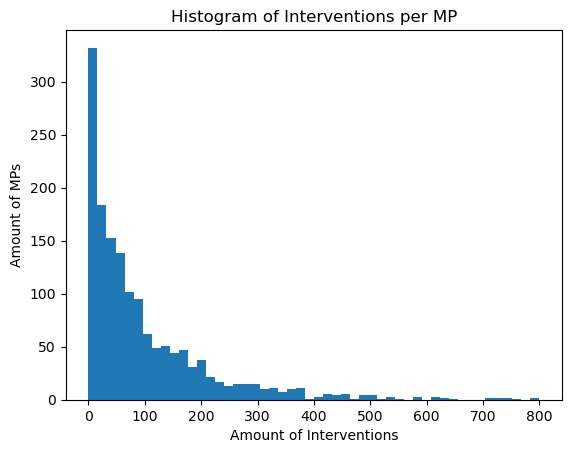

In [113]:
import matplotlib.pyplot as plt
plt.hist(count_of_interventions['orador'].tolist(), range = [0, 800], bins = 50)
plt.title('Histogram of Interventions per MP')
plt.xlabel('Amount of Interventions')
plt.ylabel('Amount of MPs')

In [125]:
# Export.
concatenated.to_csv("../data/final/legislatures-7-to-14-with-parsed-texts.csv", index=False)